In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[2, 0.5], [0.5, -1]])
eigenvalues, eigenvectors = np.linalg.eig(A)

# get first eigenvalue and eigenvector
u1 = eigenvectors[:,0]
lambda1 = eigenvalues[0]

In [45]:
np.random.seed(42)
mean = np.array([3,3])
cov = np.array([[2,1], [1, 1]])
X = np.random.multivariate_normal(mean, cov, 300)

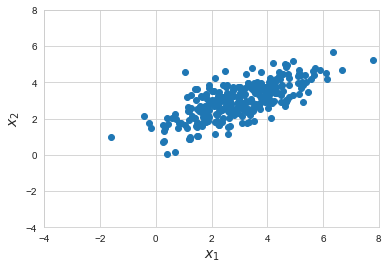

In [46]:
import seaborn as sns 
sns.set_style("whitegrid")
plt.scatter(X[:,0], X[:,1])
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.xlim(-4,8)
plt.ylim(-4,8)
plt.show()

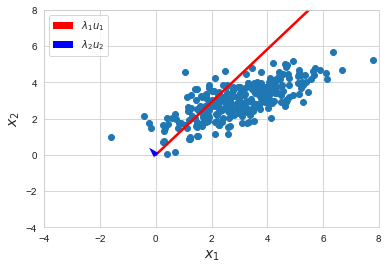

In [53]:
K = X.T@X/X.shape[0]
eigenvalues, eigenvectors = np.linalg.eig(K)
origin=np.array([0,0])

# plot data
plt.scatter(X[:,0], X[:,1])
plt.quiver(*origin, *(eigenvectors[:,0]*eigenvalues[0]), label=r'$\lambda_1 u_1$', scale=1, units='xy', color='red')
plt.quiver(*origin, *(eigenvectors[:,1]*eigenvalues[1]), label=r'$\lambda_2 u_2$', scale=1, units='xy', color='blue')
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.legend()
plt.xlim(-4,8)
plt.ylim(-4,8)
plt.show()

In [54]:
# define centering matrix
Hn = np.eye(X.shape[0]) - np.ones(shape=(X.shape[0],X.shape[0]))/X.shape[0]

# get centered data
Xc = Hn@X

# check that the columns actually have mean zero
print(np.mean(Xc[:,0]), np.mean(Xc[:,1]))

3.375077994860476e-16 -2.457293627837013e-16


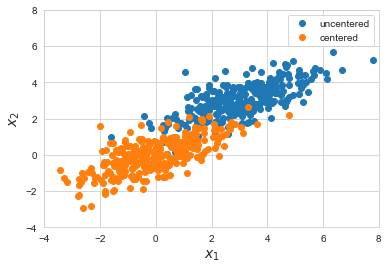

In [55]:
# plot data
plt.scatter(X[:,0], X[:,1], label="uncentered")
plt.scatter(Xc[:,0], Xc[:,1], label="centered")
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.legend()
plt.xlim(-4,8)
plt.ylim(-4,8)
plt.show()

In [56]:
C = Xc.T@Xc/X.shape[0]
C

array([[1.92047819, 0.95424773],
       [0.95424773, 0.93758217]])

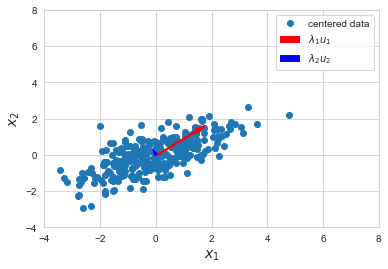

In [57]:
# get eigenthings
eigenvalues, eigenvectors = np.linalg.eig(C)

# plot data
plt.scatter(Xc[:,0], Xc[:,1], label="centered data")
plt.quiver(*origin, *(eigenvectors[:,0]*eigenvalues[0]), label=r'$\lambda_1 u_1$', scale=1, units='xy', color='red')
plt.quiver(*origin, *(eigenvectors[:,1]*eigenvalues[1]), label=r'$\lambda_2 u_2$', scale=1, units='xy', color='blue')
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.legend()
plt.xlim(-4,8)
plt.ylim(-4,8)
plt.show()